<a href="https://colab.research.google.com/github/lmcanavals/acomplex/blob/main/1299_yet_another_ford_fulkerson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import graphviz as gv
import numpy as np

In [34]:
%%file g.am
S A B C D T
2 1
3 3
3 5
1 5
1 3
2 7
S A 7
S D 4
A B 5
A C 3
B T 8
C B 3
C T 5
D A 3
D C 2

Overwriting g.am


In [35]:
with open("g.am") as f:
    labels = f.readline().split()
    n = len(labels)
    l2i = {l: i for i, l in enumerate(labels)}
    pos = []
    for i in range(n):
        x, y = f.readline().split()
        pos.append((int(y), int(x)))
    G = np.zeros((n, n), dtype=int)
    for line in f:
        u, v, w = line.split()
        u, v, w = l2i[u], l2i[v], int(w)
        G[u, v] = w
    print(G)

[[0 7 0 0 4 0]
 [0 0 5 3 0 0]
 [0 0 0 0 0 8]
 [0 0 3 0 0 5]
 [0 3 0 2 0 0]
 [0 0 0 0 0 0]]


In [52]:
def show(G):
    dot = gv.Digraph("anderson")
    dot.graph_attr["layout"] = "neato"
    for i in range(n):
        x, y = pos[i]
        dot.node(str(i), labels[i], pos=f"{x},{y}!")
    for i in range(n):
        for j in range(n):
            if G[i, j] > 0:
                dot.edge(str(i), str(j), str(G[i, j]), penwidth=f"{G[i, j]}")
    return dot

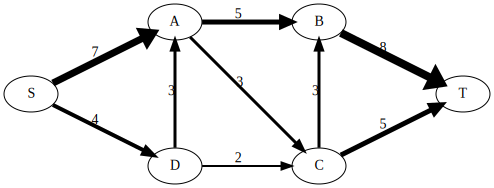

In [53]:
show(G)

In [63]:
def dfs(G, s, t):
    n = len(G)
    visited = [False]*n
    def _dfs(i):
        visited[i] = True
        if i == t:
            return [i], float('inf')
        else:
            for j in range(n):
                if G[i, j] > 0 and not visited[j]:
                    path, bottleneck = _dfs(j)
                    if path != None:
                        bottleneck = min([bottleneck, G[i, j]])
                        return [i] + path, bottleneck
        return None, 0
    return _dfs(s)

In [58]:
dfs(G, l2i['S'], l2i['T'])

([0, 1, 2, 5], 5)

In [60]:
def fordfulkerson(G, s, t):
    n = len(G)
    maxflow = 0
    residual = G.copy()
    flow = np.zeros((n, n), dtype=int)
    augPath, bottleneck = dfs(residual, s, t)
    while augPath != None:
        maxflow += bottleneck
        for k in range(len(augPath) - 1):
            i, j = augPath[k], augPath[k + 1]
            residual[i, j] -= bottleneck
            residual[j, i] += bottleneck
            flow[i, j] += bottleneck
        augPath, bottleneck = dfs(residual, s, t)
    return flow, maxflow

10


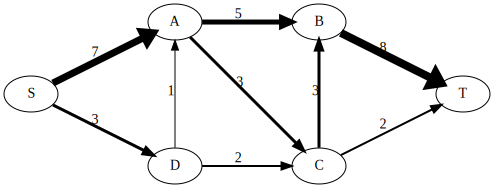

In [64]:
flowGraph, maxflow = fordfulkerson(G, l2i["S"], l2i["T"])
print(maxflow)
show(flowGraph)